In [ ]:
# использован датасет Kaggle
# Labeled Network Traffic flows - 141 Applications
# https://www.kaggle.com/datasets/jsrojas/labeled-network-traffic-flows-114-applications

In [1]:
import datetime
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as pyplot

from sklearn.decomposition import PCA

In [2]:
df_file = "Unicauca-dataset-April-June-2019-Network-flows.csv"

df = pd.read_csv(df_file)

print(sorted(df.columns))
print(df.shape)

['application_protocol', 'avg_piat', 'avg_ps', 'b_avg_piat', 'b_avg_ps', 'b_flowDuration', 'b_flowEnd', 'b_flowStart', 'b_max_piat', 'b_max_ps', 'b_min_piat', 'b_min_ps', 'b_octetTotalCount', 'b_pktTotalCount', 'b_std_dev_piat', 'b_std_dev_ps', 'category', 'dst_ip', 'dst_port', 'f_avg_piat', 'f_avg_ps', 'f_flowDuration', 'f_flowEnd', 'f_flowStart', 'f_max_piat', 'f_max_ps', 'f_min_piat', 'f_min_ps', 'f_octetTotalCount', 'f_pktTotalCount', 'f_std_dev_piat', 'f_std_dev_ps', 'flowDuration', 'flowEnd', 'flowEndReason', 'flowStart', 'flow_key', 'max_piat', 'max_ps', 'min_piat', 'min_ps', 'octetTotalCount', 'pktTotalCount', 'proto', 'src_ip', 'src_ip_numeric', 'src_port', 'std_dev_piat', 'std_dev_ps', 'web_service']
(2704839, 50)


In [3]:
df.head(5)

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP


In [4]:
print(len(df['src_ip'].unique()))
print(len(df['dst_ip'].unique()))

716
104463


In [15]:
src_ip_df = df['src_ip'].copy()
src_ip_df = src_ip_df.dropna().copy()
src_ip_df=src_ip_df.drop_duplicates()

print(src_ip_df.shape)
print(src_ip_df.head(5))

(716,)
0       192.168.121.1
15      192.168.121.2
167     192.168.121.3
873     192.168.121.4
2397    192.168.121.7
Name: src_ip, dtype: object


In [16]:
src_ip_df = src_ip_df.to_frame(name='src_ip')

print(src_ip_df.shape)
print(src_ip_df.head(5))

(716, 1)
             src_ip
0     192.168.121.1
15    192.168.121.2
167   192.168.121.3
873   192.168.121.4
2397  192.168.121.7


In [17]:
src_ip_df.loc[:, 'oct1'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[0])
src_ip_df.loc[:, 'oct2'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[1])
src_ip_df.loc[:, 'oct3'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[2])
src_ip_df.loc[:, 'oct4'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[3])

print(src_ip_df.head(5))

             src_ip oct1 oct2 oct3 oct4
0     192.168.121.1  192  168  121    1
15    192.168.121.2  192  168  121    2
167   192.168.121.3  192  168  121    3
873   192.168.121.4  192  168  121    4
2397  192.168.121.7  192  168  121    7


In [18]:
src_ip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 2637498
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   src_ip  716 non-null    object
 1   oct1    716 non-null    object
 2   oct2    716 non-null    object
 3   oct3    716 non-null    object
 4   oct4    716 non-null    object
dtypes: object(5)
memory usage: 33.6+ KB


In [19]:
X_matrix_src = np.array(src_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(X_matrix_src.shape)
print(X_matrix_src[0:5])
print()

(716, 4)
[['192' '168' '121' '1']
 ['192' '168' '121' '2']
 ['192' '168' '121' '3']
 ['192' '168' '121' '4']
 ['192' '168' '121' '7']]



In [20]:
pcas = PCA(n_components=4)
pcas.fit(X_matrix_src)
print(pcas.explained_variance_ratio_)

[9.98311121e-01 1.68887888e-03 6.33919894e-34 0.00000000e+00]


In [ ]:
# размерность можно смело уменьшать
# 1-й компонент объясняет 99,8% изменчивости
# 1-й и 2-й компонент объясняют вместе 99% изменичивости


In [21]:
pca_src = PCA(n_components=2)
pcas = pca_src.fit_transform(X_matrix_src)

pcas1=[]
pcas2=[]

#source
for i in pcas:
    pcas1.append(i[0])
    pcas2.append(i[1])
    
print(len(pcas1))
print(len(pcas2))
print(pcas.shape)

716
716
(716, 2)


In [22]:
src_ip_df['pca1'] = pcas1
src_ip_df['pca2'] = pcas2

print(src_ip_df.shape)
print(src_ip_df.head(5))

(716, 7)
             src_ip oct1 oct2 oct3 oct4       pca1      pca2
0     192.168.121.1  192  168  121    1 -97.857846  3.385151
15    192.168.121.2  192  168  121    2 -96.857872  3.392334
167   192.168.121.3  192  168  121    3 -95.857898  3.399517
873   192.168.121.4  192  168  121    4 -94.857924  3.406700
2397  192.168.121.7  192  168  121    7 -91.858001  3.428250


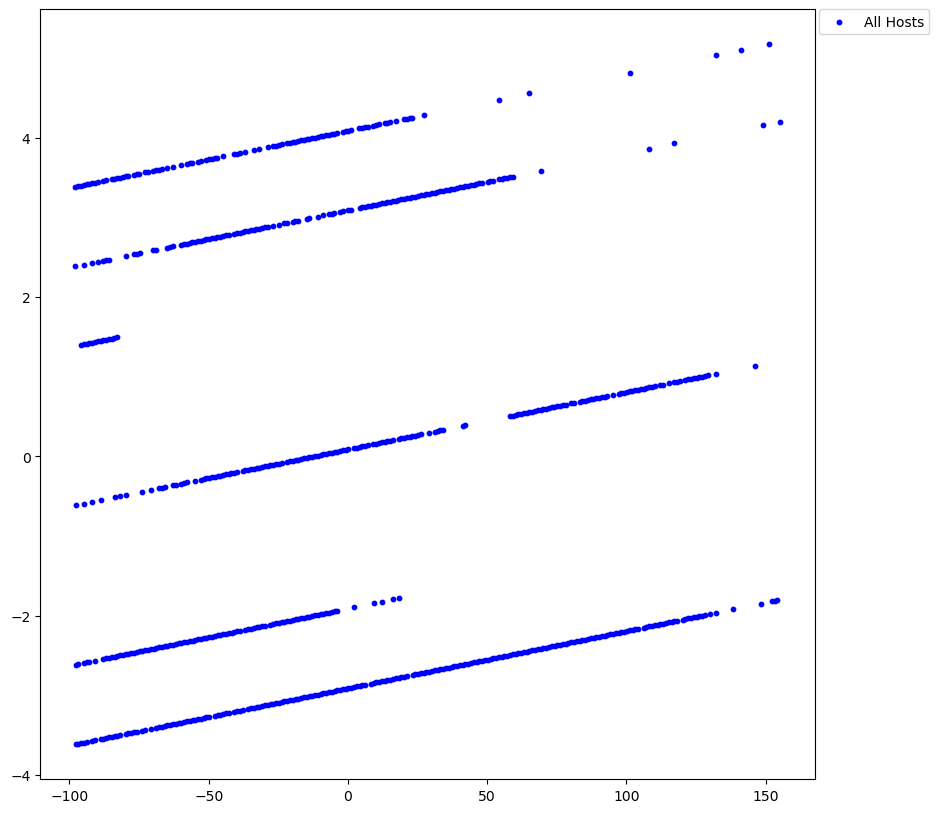

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(src_ip_df['pca1'], src_ip_df['pca2'], s=10, color='blue',label="All Hosts")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

In [35]:


print(src_ip_df.shape)
print(src_ip_df.head(5))

(716, 8)
   index         src_ip oct1 oct2 oct3 oct4       pca1      pca2
0      0  192.168.121.1  192  168  121    1 -97.857846  3.385151
1     15  192.168.121.2  192  168  121    2 -96.857872  3.392334
2    167  192.168.121.3  192  168  121    3 -95.857898  3.399517
3    873  192.168.121.4  192  168  121    4 -94.857924  3.406700
4   2397  192.168.121.7  192  168  121    7 -91.858001  3.428250


In [39]:
src_ip_df1 = src_ip_df.reset_index(drop= True)
src_ip_df1.drop('index', axis= 1 , inplace= True )
src_ip_df1.to_csv('ips_prepared_dataset.csv', sep=';', index=False)